# To predict if a person  survived the titanic crash based on the available data 


## Features 
    

PassengerId-gives the passenger number 

Survived-not survided(0) survived (1)

Pclass- A proxy for socio-economic status (SES)
        1st = Upper
        2nd = Middle
        3rd = Lower
Name-passengers name

Sex- male or female

Age- age of the person
     Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp- # of siblings / spouses aboard the Titanic
         The dataset defines family relations in this way...
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)

Parch-# of parents / children aboard the Titanic
      The dataset defines family relations in this way...
      Parent = mother, father
      Child = daughter, son, stepdaughter, stepson
      Some children travelled only with a nanny, therefore parch=0 for them.

Ticket-the ticket number

Fare-the ticket fare in dollars

Cabin-the cabin number

Embarked-Port of Embarkation

         C = Cherbourg, Q = Queenstown, S = Southampton

      



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [2]:
df2=pd.read_csv("tested.csv",index_col=0)
df=pd.read_csv("train.csv",index_col=0)
df4=pd.read_csv("gender_submission.csv",index_col=0)
df4.drop(columns="Survived",inplace=True)
df=pd.concat([df,df2],axis=0)
df.head()
df4.head()

""
PassengerId
892
893
894
895
896


In [3]:
print(df.shape)
#df2.shape


(1309, 11)


In [4]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [5]:
df.Age.mean()

29.881137667304014

In [6]:
df.Age.median()

28.0

In [7]:
df.Age=df.Age.fillna(df.Age.mean())#replacing the null values with mean
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(columns="Cabin",inplace=True)#removed the cabin column since most values are null
df = df[df['Embarked'].notna()]
df = df[df['Fare'].notna()]
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
np.size(df.Ticket.unique())
#np.ndim(df.Ticket.unique())


927

In [10]:
le = LabelEncoder()
df['Embarked_new']=le.fit_transform(df["Embarked"])
df['Sex_new']=le.fit_transform(df.Sex)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_new,Sex_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,1


In [11]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [12]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
#df3=df.groupby("Survived")
#df3.head()
#df3[df3.Survived==1 and df3.Pclass==1].size()

In [14]:
print(df.Age[df["Age"]>80].head())

print(df.Age[df["Age"]<0].head())#to check if there is any outliers in Age

Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)


# GRPAHS

[Text(0.5, 1.0, 'survived count'), Text(0.5, 0, 'SURVIVED')]

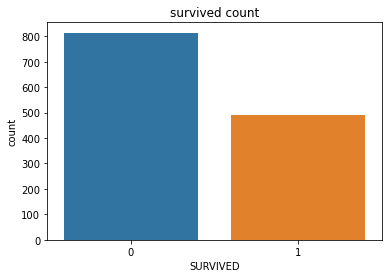

In [15]:

sns.countplot(x="Survived",data=df).set(title="survived count",xlabel="SURVIVED")


<AxesSubplot:xlabel='Pclass', ylabel='count'>

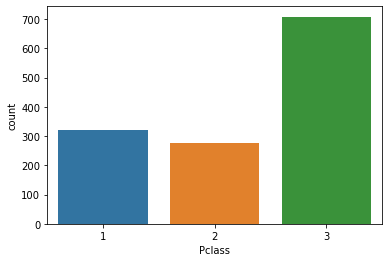

In [16]:
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

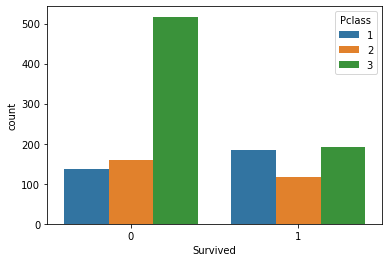

In [17]:






sns.countplot(x="Survived",hue="Pclass",data=df)



#therefore it is evident that your chance of survival depends on your Pclass

,sum_sq,df,F,PR(>F)
C(Sex),144.902911,1.0,1168.18562,2.391995e-183
Residual,161.749462,1304.0,NaN,NaN


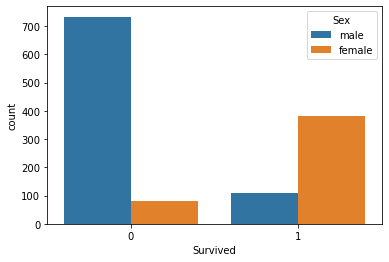

In [18]:
sns.countplot(x="Survived",hue="Sex",data=df)
model = ols('Survived ~ C(Sex) ', data=df).fit()
sm.stats.anova_lm(model, typ=2)



#it is evident that if you are a female your chance of survival is high from the p value


,sum_sq,df,F,PR(>F)
C(SibSp),10.551774,6.0,7.715145,3.630270e-08
Residual,296.100600,1299.0,NaN,NaN


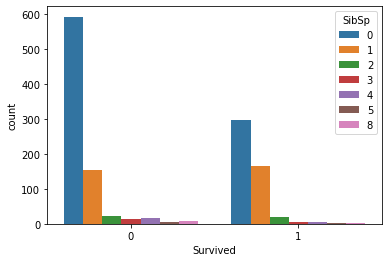

In [19]:
sns.countplot(x="Survived",hue="SibSp",data=df)
model = ols('Survived ~  C(SibSp) ', data=df).fit()
sm.stats.anova_lm(model, typ=2)




,sum_sq,df,F,PR(>F)
C(Parch),10.854594,7.0,6.804486,5.922771e-08
Residual,295.797780,1298.0,NaN,NaN


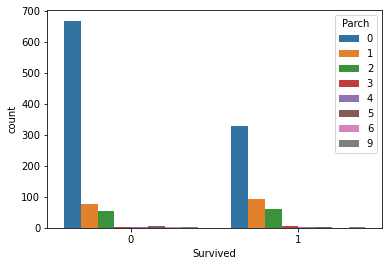

In [20]:
sns.countplot(x="Survived",hue="Parch",data=df)
model = ols('Survived ~  C(Parch) ', data=df).fit()
sm.stats.anova_lm(model, typ=2)

#there is a chance you wont survive if you are alone

,sum_sq,df,F,PR(>F)
C(Embarked),5.763881,2.0,12.480267,0.000004
Residual,300.888492,1303.0,NaN,NaN


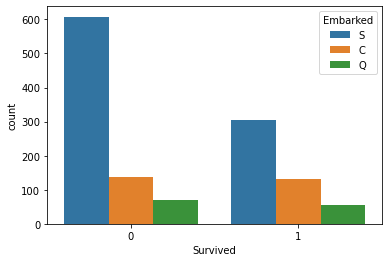

In [21]:
sns.countplot(x="Survived",hue="Embarked",data=df)
model = ols('Survived ~ C(Embarked) ', data=df).fit()
sm.stats.anova_lm(model, typ=2)


#Your chance of survival is low if you have boarded from southampton

,sum_sq,df,F,PR(>F)
C(Pclass),1.268730e+06,2.0,370.945229,3.053165e-128
Residual,2.228301e+06,1303.0,NaN,NaN


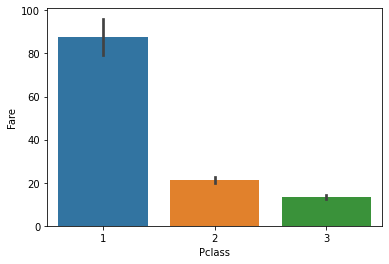

In [22]:
sns.barplot(x="Pclass",y="Fare",data=df)

model = ols('Fare ~ C(Pclass)  ', data=df).fit()
sm.stats.anova_lm(model, typ=2)



PointbiserialrResult(correlation=-0.0504526956453232, pvalue=0.06834795120232773)

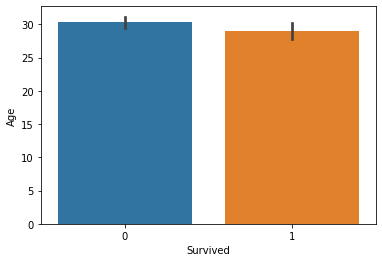

In [23]:
sns.barplot(x="Survived",y="Age",data=df)
model = ols('Age ~ C(Survived)  ', data=df).fit()
sm.stats.anova_lm(model, typ=2)
stats.pointbiserialr(df.Age,df.Survived)
# as age increases your chance of survival decreases




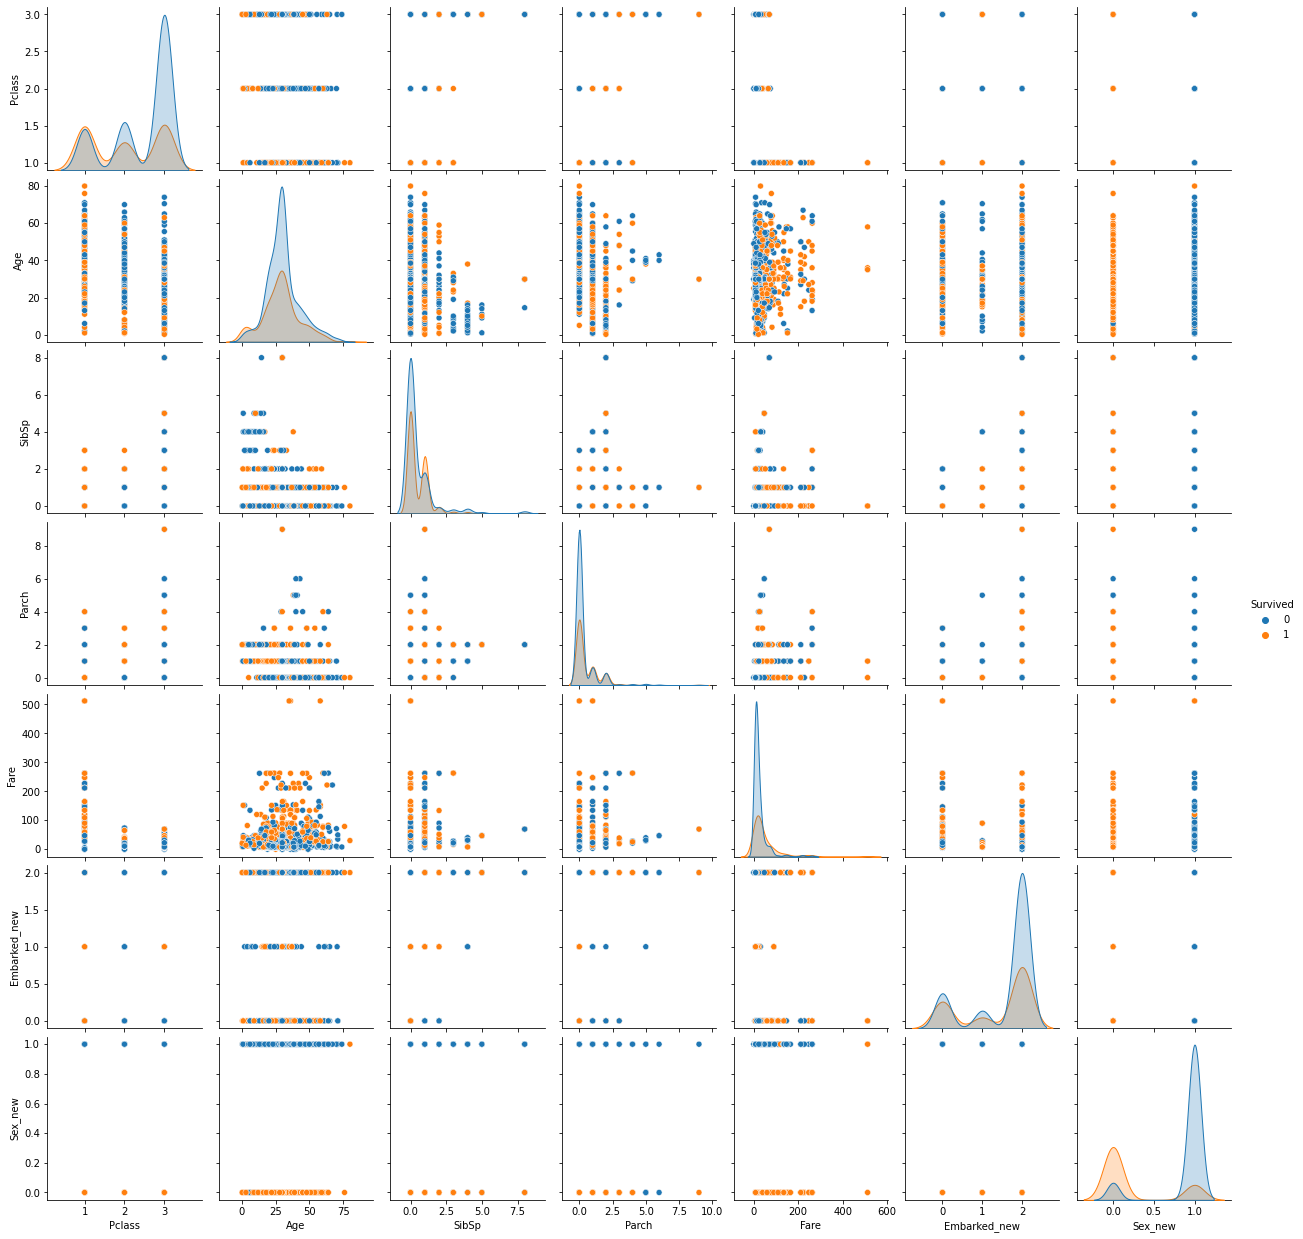

In [24]:
sns.pairplot(df,hue="Survived")



In [25]:
df_new=df.drop(columns=["Name","Sex","Embarked","Fare","Ticket"])
df_new.head()


,Survived,Pclass,Age,SibSp,Parch,Embarked_new,Sex_new
PassengerId,,,,,,,
1,0,3,22.0,1,0,2,1
2,1,1,38.0,1,0,0,0
3,1,3,26.0,0,0,2,0
4,1,1,35.0,1,0,2,0
5,0,3,35.0,0,0,2,1


# Modelling


## Decision tree algorithm



In [26]:

Y=df_new.iloc[:,0:1]
X=df_new.iloc[:,1:]


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.32,random_state=100)
clf_entropy=DecisionTreeClassifier(criterion ="entropy",random_state=100, max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,Y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [27]:
Y_pred=clf_entropy.predict(X_test)
np.size(Y_pred)
Y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [28]:
print(accuracy_score(Y_test,Y_pred))
cross_val_score(clf_entropy,Y_test, Y_pred).mean()


0.8516746411483254


0.8517498565691337

# logistic regression


In [29]:
logreg = LogisticRegression()
Y_train=np.ravel(Y_train)

logreg.fit(X_train, Y_train)

Y_pred=logreg.predict(X_test)
#print(Y_pred)
print(accuracy_score(Y_test,Y_pred))



0.8516746411483254


In [30]:
Y_pred=pd.Series(Y_pred,name="Survived")
df4=pd.concat([df4,Y_pred],axis=1)
df4.head()
df4.shape



(836, 1)

In [31]:
#df4.to_csv("gender_submission_2.csv")